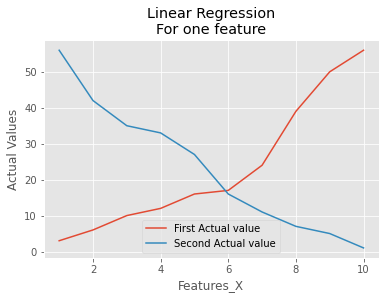

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import style
#import matplotlib.animation as animation
from mplfinance.original_flavor import candlestick_ohlc
import random
import csv
import numpy as np
import urllib
import datetime as dt

from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import axes3d

style.use('ggplot')

X = [1,2,3,4,5,6,7,8,9,10]
y = [3,6,10,12,16,17,24,39,50,56]

X2 = [1,2,3,4,5,6,7,8,9,10]
y2 = [56,42,35,33,27,16,11,7,5,1]

#plotting data
plt.plot(X, y, label='First Actual value')
plt.plot(X2, y2, label='Second Actual value')

#putting labels
plt.xlabel('Features_X')
plt.ylabel('Actual Values')
plt.legend()
plt.title('Linear Regression\nFor one feature')



plt.show() # to show the graph

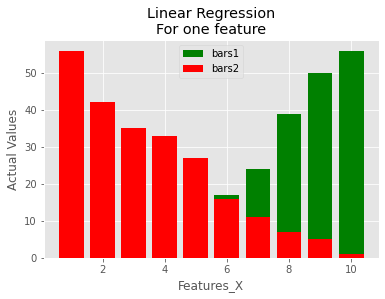

In [3]:
#bar charts
plt.bar(X,y,label='bars1',color='green')
plt.bar(X2,y2,label='bars2',color='red')
#label
plt.xlabel('Features_X')
plt.ylabel('Actual Values')
plt.legend()
plt.title('Linear Regression\nFor one feature')
plt.show()

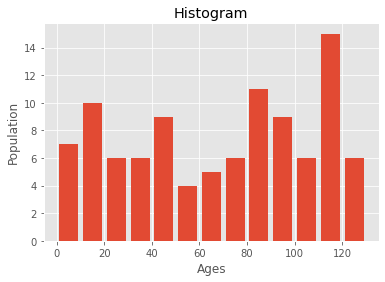

In [4]:
#generating information
population = []
for i in range(1,101):
    population.append(random.randint(0,130))
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

#plotting histogram
plt.hist(population,bins,histtype='bar',rwidth=0.8)

plt.xlabel('Ages')
plt.ylabel('Population')
plt.title('Histogram')
plt.show()

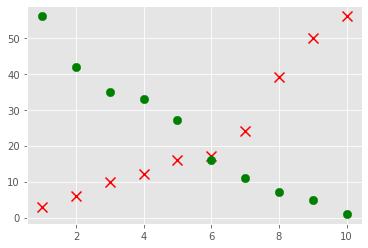

In [5]:
#scatter plot
plt.scatter(X,y,label='Scatter Plot',color='red',marker='x',s=100)
plt.scatter(X2,y2,label='Scatter Plot',color='green',marker='o',s=70)
plt.show()

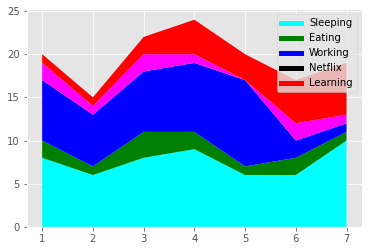

In [6]:
#stack plot

days     = [1,2,3,4,5,6,7] # x_axis
# all below are y_axis
sleeping = [8,6,8,9,6,6,10]
eating   = [2,1,3,2,1,2,1]
working  = [7,6,7,8,10,2,1]
netflix  = [2,1,2,1,0,2,1]
learning = [1,1,2,4,3,5,6]

plt.stackplot(days,sleeping,eating,working,netflix,learning,colors=['cyan','green','blue','magenta','red'])

plt.plot([],[],color='cyan',label='Sleeping',linewidth=5)
plt.plot([],[],color='green',label='Eating',linewidth=5)
plt.plot([],[],color='blue',label='Working',linewidth=5)
plt.plot([],[],color='black',label='Netflix',linewidth=5)
plt.plot([],[],color='red',label='Learning',linewidth=5)
plt.legend()

plt.show()

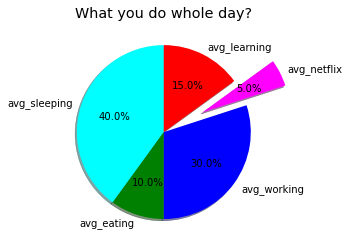

In [7]:
avg_sleeping = round(sum(sleeping)/len(sleeping))
avg_eating = round(sum(eating)/len(eating))
avg_working = round(sum(working)/len(working))
avg_netflix = round(sum(netflix)/len(netflix))
avg_learning = round(sum(learning)/len(learning))
activities = ['avg_sleeping','avg_eating','avg_working','avg_netflix','avg_learning']
slices = [avg_sleeping,avg_eating,avg_working,avg_netflix,avg_learning]
colr = ['cyan','green','blue','magenta','red']

plt.pie(slices,
        labels = activities,
        colors=colr,
        startangle=90,
        shadow=True,
        explode=(0,0,0,0.5,0),
       autopct='%1.1f%%')

plt.title('What you do whole day?')
plt.show()

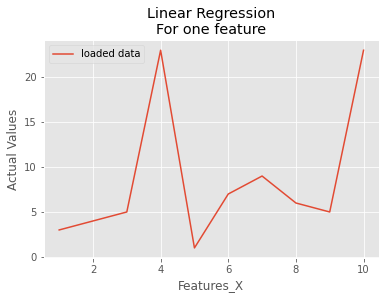

In [8]:
#loading file from computer

x = []
y = []

with open('matplotlib_csv.txt','r') as csvfile:
    plots = csv.reader(csvfile,delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
plt.plot(x,y,label='loaded data')
plt.xlabel('Features_X')
plt.ylabel('Actual Values')
plt.legend()
plt.title('Linear Regression\nFor one feature')
plt.show()


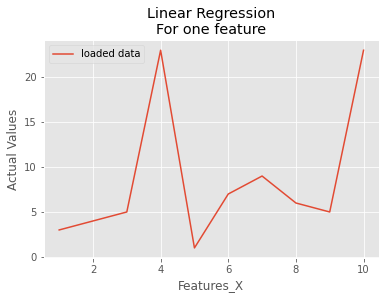

In [9]:
#loading data with numpy
x,y=np.loadtxt('matplotlib_csv.txt',delimiter=',',unpack=True)

plt.plot(x,y,label='loaded data')
plt.grid(True)
plt.xlabel('Features_X')
plt.ylabel('Actual Values')
plt.legend()
plt.title('Linear Regression\nFor one feature')
plt.show()


In [10]:
#loading data from internet
def graph_data():
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1,colspan=1)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=1,colspan=1)
    ax3 = plt.subplot2grid((6,1), (2,0), rowspan=1,colspan=1)
    ax4 = plt.subplot2grid((6,1), (3,0), rowspan=1,colspan=1)
    ax5 = plt.subplot2grid((6,1), (4,0), rowspan=1,colspan=1)
    ax6 = plt.subplot2grid((6,1), (5,0), rowspan=1,colspan=1)
    
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    source_code_split = source_code.split('\n')
    for line in source_code_split:
        split_line = line.split(',')
        if len(split_line)==7:
            stock_data.append(line)
    stock_data.remove(stock_data[0])
    
    date,openp, highp, lowp, closep, adj_closep, volume = np.loadtxt(stock_data, 
                                                          delimiter = ',', 
                                                          unpack=True,
                                                          converters = {0: lambda x: mdates.datestr2num(x.decode('utf-8'))})
# to convert UNIX datetime to normal datetime
# import datetime as dt
# dateconv = np.vectorize(dt.datetime.fromtimestamp)
# date = dateconv(date)
    
    ax1.plot_date(date,openp,'-',label='Opening Price',color='blue')
    ax2.plot_date(date,highp,'-',label='High Price',color='black')
    ax3.plot_date(date,lowp,'-',label='Low Price',color='yellow')
    ax4.plot_date(date,closep,'-',label='Closing Price',color='cyan')
    ax5.plot_date(date,adj_closep,'-',label='Adj.Closing Price',color='magenta')
    ax6.plot_date(date,volume,'-',label='Volume',color='red')
    
    #ax1.fill_between(date,closep,closep[0],where=(closep>closep[0]),alpha=0.5,facecolor='g') #to fill the colors
    #ax1.fill_between(date,closep,closep[0],where=(closep<closep[0]),alpha=0.5,facecolor='r') #to fill the colors
    
    #ax1.plot([],[],linewidth=5, label='profit',color='g',alpha=0.5)
    #ax1.plot([],[],linewidth=5, label='loss',color='r',alpha=0.5)
    #ax1.axhline(closep[0],color='k',linewidth=2)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)
    #ax1.set_yticks([0,250,500,750,1000])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    #plt.title('Stock Data for TESLA')
    plt.show()
    print(plt.style.available)
    #print(plt.__file__)

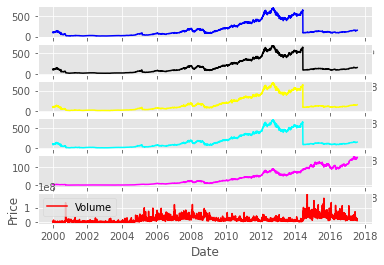

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
graph_data()

In [12]:
#ohlc candlesticks
def graph_data_ohlc():
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1,colspan=1)
    plt.title('Stock Data for TESLA')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4,colspan=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1,colspan=1)
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    source_code_split = source_code.split('\n')
    for line in source_code_split:
        split_line = line.split(',')
        if len(split_line)==7:
            stock_data.append(line)
    stock_data.remove(stock_data[0])
    
    date,openp, highp, lowp, closep, adj_closep, volume = np.loadtxt(stock_data[400:450], 
                                                          delimiter = ',', 
                                                          unpack=True,
                                                          converters = {0: lambda x: mdates.datestr2num(x.decode('utf-8'))})

    count=0
    date_count = len(date)
    ohlc = []
    
    while(count<date_count):
        append_me = date[count], openp[count], highp[count], lowp[count], closep[count], adj_closep[count], volume[count]
        ohlc.append(append_me)
        count+=1
    
    candlestick_ohlc(ax2, ohlc, width=0.6, colorup='g',colordown='r')
    
    
    
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)
    
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
#    font_dict = {'family':'serif',
#                 'color':'darkred',
#                 'size': 10
#                }
#    ax1.text(date[2],closep[0],'Tesla Prices',fontdict=font_dict)
    
    
    #ax1.annotate('Price Crashing!!!',(date[30],closep[14]),xytext=(0.8,0.9),textcoords='axes fraction',arrowprops=dict(facecolor='grey'))
    ax2.annotate(str(closep[-1]),(date[-1],closep[-1]),
                xytext=(date[-1]+74,closep[-1]),bbox=dict(boxstyle='round',fc='w',ec='k',lw=1))
    
    
    #plt.legend()
    
    plt.show()

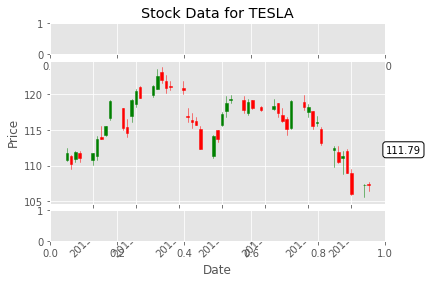

In [13]:
graph_data_ohlc()

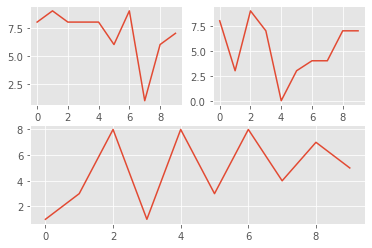

In [14]:
#subplot

fig = plt.figure()

def create_plots():
    xs = []
    ys = []
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return (xs,ys)

#add subplot index
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)
x,y = create_plots()
ax1.plot(x,y)
x,y = create_plots()
ax2.plot(x,y)
x,y = create_plots()
ax3.plot(x,y)

plt.show()

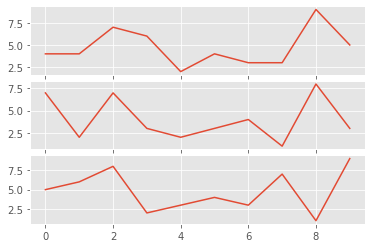

In [15]:
#subplot grid

fig = plt.figure()

def create_plots():
    xs = []
    ys = []
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return (xs,ys)

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=2,colspan=1) #total grids, starting grid number, no. of rows for the graph,
# no. of column for the graph

ax2 = plt.subplot2grid((6,1),(2,0),rowspan=2,colspan=1)
ax3 = plt.subplot2grid((6,1),(4,0),rowspan=2,colspan=1)

x,y = create_plots()
ax1.plot(x,y)
x,y = create_plots()
ax2.plot(x,y)
x,y = create_plots()
ax3.plot(x,y)

plt.show()

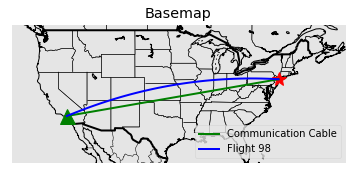

In [33]:
#Basemap

m = Basemap(projection='mill',
           llcrnrlat=25,
           llcrnrlon=-130,
           urcrnrlat=50,
           urcrnrlon=-60,
           resolution='l')
m.drawcoastlines()
m.drawcountries(linewidth=2)
#m.fillcontinents(color='coral')
#m.etopo()
m.drawstates(color='k')
#m.bluemarble()
#m.drawparallels(np.arange(-90.,120.,30.))
#m.drawmeridians(np.arange(0.,420.,60.))
#m.drawmapboundary(fill_color='aqua')
xs=[]
ys=[]

NYClat,NYClon = 40.7127,-74.0059
xpt,ypt=m(NYClon,NYClat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt,ypt,'r*',markersize=15)

LAlat,LAlon = 34.05,-118.25
xpt2,ypt2 = m(LAlon,LAlat)
xs.append(xpt2)
ys.append(ypt2)
m.plot(xpt2,ypt2,'g^',markersize=15)

m.plot(xs,ys,color='green',linewidth=2,label='Communication Cable')
m.drawgreatcircle(NYClon,NYClat,LAlon,LAlat,linewidth=2,color='blue',label='Flight 98')
plt.legend(loc=4)
plt.title('Basemap')
plt.show()

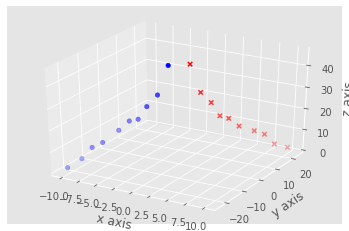

In [61]:
#3D maps
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

x=[-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]
y=[-2,-4,-6,-7,-8,-10,-15,-17,-19,-23]
z=[45,32,27,21,20,16,12,10,5,2]

x2=[1,2,3,4,5,6,7,8,9,10]
y2=[2,4,6,7,8,10,15,17,19,23]
z2=[45,32,27,21,20,16,12,10,5,2]

#ax1.plot(x,y,z,color='g')
ax1.scatter(x,y,z,color='b')
ax1.scatter(x2,y2,z2,color='r',marker='x')
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
plt.show()


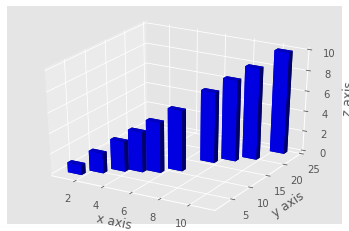

In [62]:
#3D Bar Chart
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

x3=[1,2,3,4,5,6,7,8,9,10]
y3=[2,4,6,7,8,10,15,17,19,23]
z3=np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]
ax1.bar3d(x3,y3,z3,dx,dy,dz,color='b')

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
plt.show()

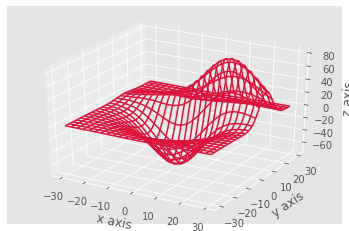

In [67]:
#more 3D
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

x,y,z=axes3d.get_test_data()
ax1.plot_wireframe(x,y,z,rstride=5,cstride=5,color='crimson')

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
plt.show()

Go to matplotlib.org for more **documentation and examples**. You can learn through documentation from now on.